# Quetelet - Project 1

### Research Question: Our project is analyzing the demographic and structural shifts in China's economy and population throughout various reform periods in the last 60 years, including the Great Leap Forward, The Reform Period, and the One-Child Policy.

Project Goals: Identify key changes in agriculture, fertility rates, and gdp and population growth during the reform periods.

In [1]:
!pip install pandas numpy matplotlib seaborn wbdata plotly requests

  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dateparser-1.3.0-py3-none-any.whl.metadata (30 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached dateparser-1.3.0-py3-none-any.whl (318 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cach

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import wbdata
import requests
from datetime import datetime

Key '-4407602085803484711' not in persistent cache.
Key '5877754811266171733' not in persistent cache.
Key '278786688749139134' not in persistent cache.
Key '-9049919747895495614' not in persistent cache.
Key '-7628363075341430075' not in persistent cache.
Key '-419002304839775980' not in persistent cache.
Key '6640465993763933821' not in persistent cache.
Key '2496346023328891656' not in persistent cache.
Key '-1266683770326635388' not in persistent cache.
Key '1998148331671922918' not in persistent cache.
Key '-8669777557573796910' not in persistent cache.
Key '-4997861486059490893' not in persistent cache.
Key '1537280600941238850' not in persistent cache.
Key '-1628684443409550918' not in persistent cache.
Key '-1989679173145733706' not in persistent cache.
Key '689599135454379442' not in persistent cache.
Key '852930617321176712' not in persistent cache.
Key '-2837360638632593114' not in persistent cache.
Key '4372000131869060981' not in persistent cache.
Key '-3789387044770834191

In [3]:
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
#sns.set_style("whitegrid")
start_year = 1950
end_year = 2025

In [5]:
country_name = "China"
country_code = "CHN"

reform_periods = {"Great Leap Forward": (1958,1962),
                  "Post-Mao Transition": (1976,1978),
                  "Reform Era Start": (1978, 1992),
                  "WTO Entry": (2001, 2005),
                  "One-Child Policy": (1980, 2015)}

In [58]:
indicators = { "NY.GDP.MKTP.CD": "gdp",
               "NY.GDP.PCAP.CD": "gdp_percap",
               "SP.DYN.TFRT.IN": "fertility",
               "SP.POP.TOTL": "pop",
               "SP.POP.GROW": "pop_growth",
               "NV.AGR.TOTL.ZS": "ag_va"} #ag as % of GDP

In [59]:
def get_wb_data(indicator_dict, country_code, start, end):
    data = wbdata.get_dataframe(indicator_dict,
                                country = country_code,
                                date = (datetime(start, 1, 1), datetime(end, 1, 1)))
    data = data.reset_index()
    data["date"] = data["date"].astype(int)

    return data.sort_values("date")

In [60]:
china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df.head()

,date,gdp,gdp_percap,fertility,pop,pop_growth,ag_va
64,1960,5.984624e+10,89.715075,4.451,667070000.0,NaN,23.124958
63,1961,5.016230e+10,75.965501,3.863,660330000.0,-1.015528,35.719491
62,1962,4.731074e+10,71.061685,6.085,665770000.0,0.820456,38.902722
61,1963,5.081223e+10,74.468154,7.513,682335000.0,2.457647,39.771365
60,1964,5.982186e+10,85.661107,6.672,698355000.0,2.320683,37.957493


### Population Statistics Function

In [55]:
# population function
def china_pop(year, df=china_df):
    row = df.loc[df["date"] == year, "pop"]

    if row.empty:
        return None
    
    return float(row.iloc[0])

china_pop(1962)

665770000.0

In [56]:
# fertility function
def china_fert(year, df=china_df):
    row = df.loc[df["date"] == year, "fertility"]

    if row.empty:
        return None
    
    return float(row.iloc[0])

china_fert(1962)

6.085

## Population Demographics

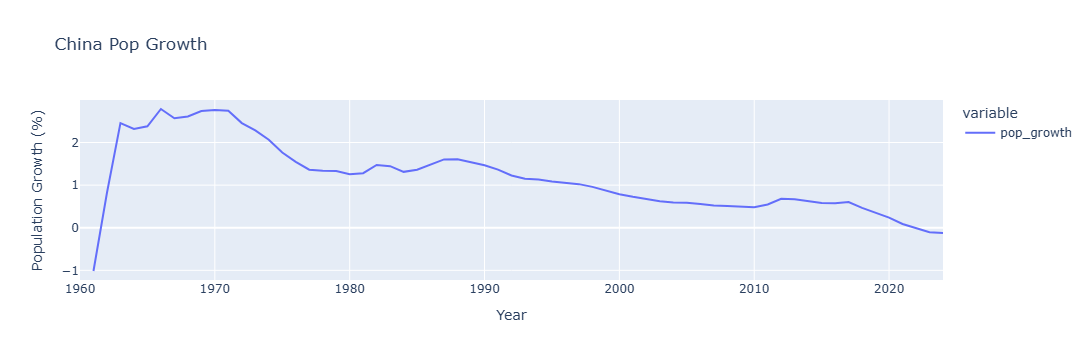

In [14]:
china_df.plot(x = "date", y = ["pop_growth"], title = "China Pop Growth",
             labels = dict(date = "Year", value = "Population Growth (%)"))

In [15]:
#automate adding reform periods to plots
def reform_plot(df, y_col, title, periods = None):

    fig = df.plot(x = "date", y = y_col, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(
            x0 = start,
            x1 = end,
            opacity = 0.12,
            annotation_text = name,
            annotation_position = "top left")

    fig.show()

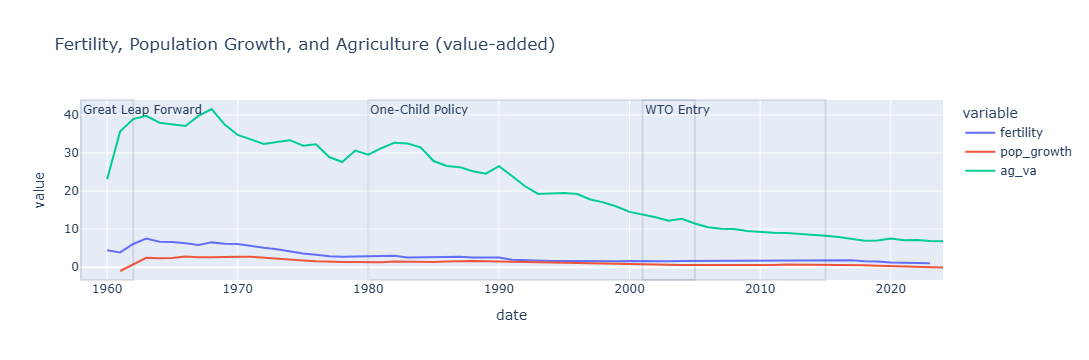

In [17]:
reform_plot(china_df, ["fertility", "pop_growth", "ag_va"], 
            "Fertility, Population Growth, and Agriculture (value-added)",
            periods = ["Great Leap Forward", "One-Child Policy", "WTO Entry"])

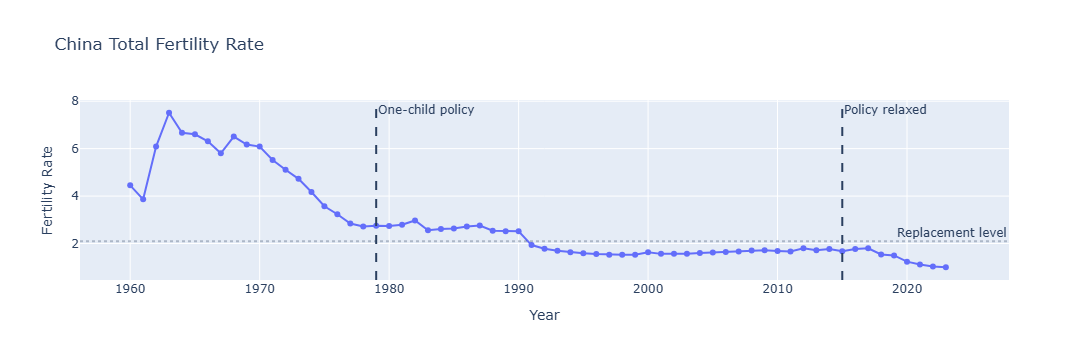

In [18]:
china_df[["date", "fertility"]].head()

fig = px.line(china_df, x = "date", y = "fertility",
              markers = True, title = "China Total Fertility Rate")

fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "Fertility Rate")

# one-child policy begins in 1979; ends in 2015

fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2015, line_dash = "dash", annotation_text = "Policy relaxed")

fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")
fig.show()

High fertility in the pre 1970s, then collapse begins as urbanization and education effects take place plus the one-child policy. Fertility drops below replacement level around 1990. Policy relaxation did not actually reverse the decline, likely due to the structural changes common to countries rapidly developing.

What caused the massive jump in fertility in the early 1960s? Let's find out.

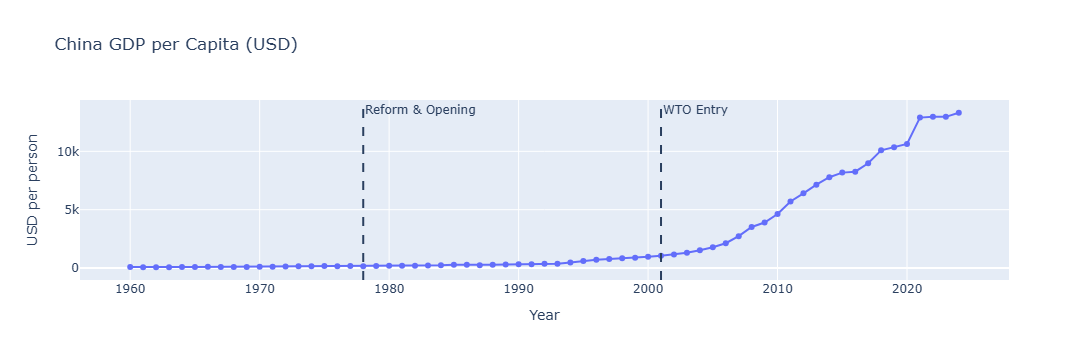

In [19]:
fig = px.line(china_df, x = "date", y = "gdp_percap",
              markers = True, title = "China GDP per Capita (USD)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "USD per person")

fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform & Opening")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

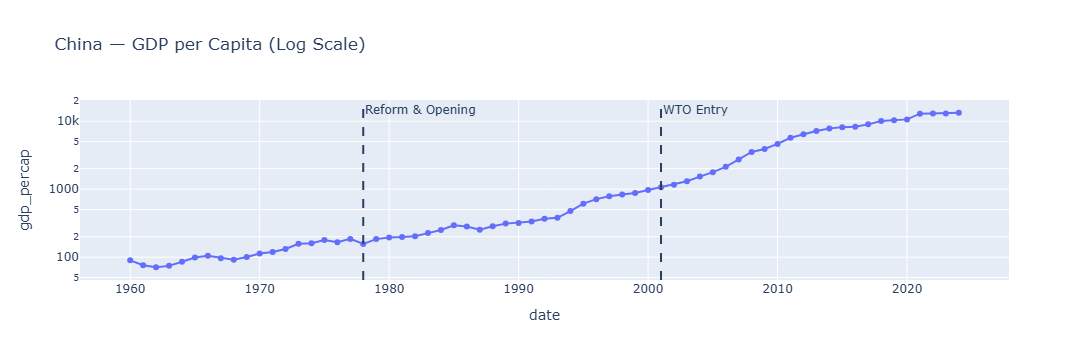

In [20]:
# log scale GDP growth to show jumps
fig_log = px.line(china_df, x = "date", y = "gdp_percap", markers = True,
                  title = "China — GDP per Capita (Log Scale)")

fig_log.update_layout(template = "plotly", yaxis_type = "log")

fig_log.add_vline(x = 1978, line_dash = "dash", annotation_text = "Reform & Opening")
fig_log.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")

fig_log.show()

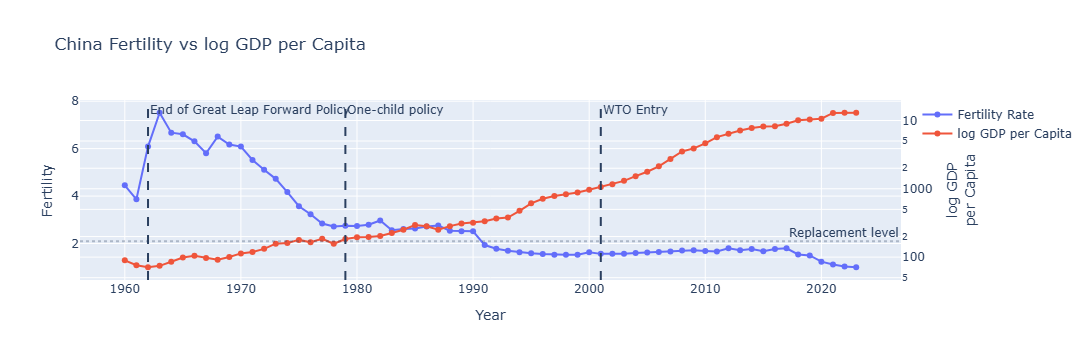

In [21]:
# fertility vs LOG gdp per cap

df = china_df.dropna(subset = ["fertility", "gdp_percap"]).copy()

import plotly.graph_objects as go
fig = go.Figure()

# fertility on left axis
fig.add_trace(go.Scatter(x = df["date"], y = df["fertility"],
                         name = "Fertility Rate", mode = "lines+markers"))
# gdp per capita on right axis
fig.add_trace(go.Scatter(x = df["date"], y = df["gdp_percap"],
                         name = "log GDP per Capita", mode = "lines+markers",
                         yaxis = "y2"))

fig.update_layout(title = "China Fertility vs log GDP per Capita",
                  xaxis_title = "Year",
                  yaxis = dict(title = "Fertility"),
                  yaxis2 = dict(title = "log GDP<br>per Capita",
                                overlaying = "y",
                                side = "right", type = "log"),
                  template = "plotly")

fig.add_vline(x = 1962, line_dash = "dash", annotation_text = "End of Great Leap Forward Policy")
fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")
fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")

fig.show()

In Lecture 1, we discussed the inverse relationship between a country's wealth and fertility. The graph above affirms what we learned about Fact 2: Women in poorer countries have higher fertility.

Falling fertility generally coincides with rising productivity and income. Notice that the economic takeoff happens most significantly after WTO entry and below replacement level fertility.
The log graph better shows the relationship b/w fertility and gdp per cap, with a more linear increase that better coincides with the decrease in fertility.

As you can see, the massive jump in fertility in 1962 coincided with the end of the the Great Leap Forward Policies and subsequently, the end of the worst effects of the Great Famine. The fertility rate rebounded after a massive crash during the famine, overshot, then stabilized around 5.5-6 before starting to drop as GDP per capita increased.

### China's GDP Per Capita Growth (Smoothed over 5-year average)

In [22]:
china_df = china_df.sort_values("date")

In [23]:
china_df["gdp_pc_growth"] = china_df["gdp_percap"].pct_change()*100
china_df["pop_growth_change"] = china_df["pop_growth"].diff()
china_df["fertility_change"] = china_df["fertility"].diff()
china_df["ag_va_change"] = china_df["ag_va"].diff()

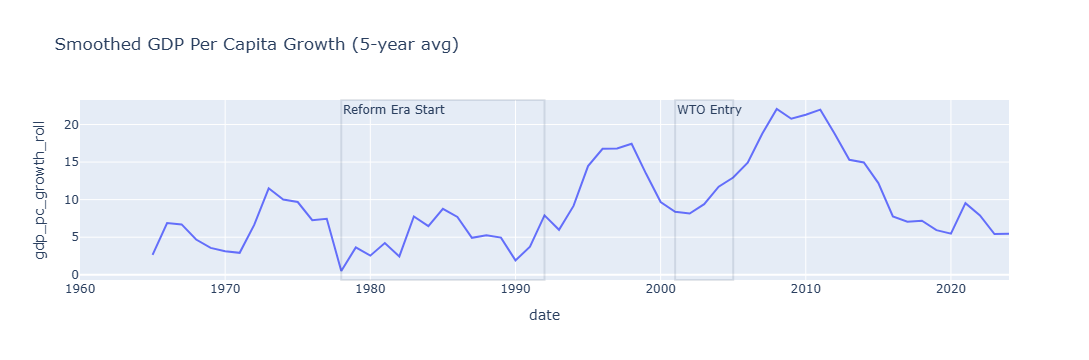

In [24]:
china_df["gdp_pc_growth_roll"] = china_df["gdp_pc_growth"].rolling(5).mean()
china_df["fertility_roll"] = china_df["fertility"].rolling(5).mean()
reform_plot(china_df, "gdp_pc_growth_roll", "Smoothed GDP Per Capita Growth (5-year avg)",
            periods = ["Reform Era Start", "WTO Entry"])

### Population Growth Rate Changes: Before, During, and After Transition Periods

In [32]:
def period_stats(df, col, start, end, window=5):

    before_mask = (df.date >= start-window) & (df.date < start)
    during_mask = (df.date >= start) & (df.date <= end)
    after_mask  = (df.date > end) & (df.date <= end+window)

    before = df.loc[before_mask, col]
    during = df.loc[during_mask, col]
    after  = df.loc[after_mask, col]

    return (before.mean(), before.count(),
            during.mean(), during.count(),
            after.mean(), after.count())

In [33]:
popgrowth = []

for name, (start, end) in reform_periods.items():
    b, bn, d, dn, a, an = period_stats(china_df, "pop_growth", start, end)

    popgrowth.append({
        "Period": name,
        "Before": b,
        "# B Obs.": bn,
        "During": d,
        "# D Obs.": dn,
        "After": a,
        "# A Obs.": an})

pd.DataFrame(popgrowth)

,Period,Before,# B Obs.,During,# D Obs.,After,# A Obs.
0,Great Leap Forward,NaN,0,-0.097536,2,2.503546,5
1,Post-Mao Transition,2.264003,5,1.416100,3,1.357345,5
2,Reform Era Start,1.805172,5,1.406013,15,1.087596,5
3,WTO Entry,0.936990,5,0.640260,5,0.514675,5
4,One-Child Policy,1.469724,5,0.981854,36,0.447750,5


Notice that during the Great Leap Forward, the population growth rate decreased as the famine increased mortality rates. We also added the number of observations the average is based on for further transparency. Recent data is more abundant.

### Population Pyramids

In [34]:
chunks = []

for chunk in pd.read_csv(
        "WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz",
        compression="gzip",
        chunksize=200000
    ):

    china_chunk = chunk[chunk["Location"].str.contains("China", na=False)]
    chunks.append(china_chunk)

pop_age = pd.concat(chunks)

/tmp/ipykernel_71/1801361086.py:3: DtypeWarning:

Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_71/1801361086.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_71/1801361086.py:3: DtypeWarning:

Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [35]:
# filter out projection variants
china = pop_age[(pop_age["ISO3_code"] == "CHN") &
                (pop_age["Variant"] == "Medium")].copy()

In [36]:
# choosing years based on reforms
years = [1960, 1980, 2000, 2020]
china = china[china["Time"].isin(years)]

In [37]:
# need to make male/female long format for pop pyramid
pyr = china[["Time", "AgeGrp", "PopMale", "PopFemale"]].copy()

pyr = pyr.rename(columns = {"Time": "year",
                            "AgeGrp": "age_group"})

pyr_long = pyr.melt(id_vars = ["year", "age_group"],
                    value_vars = ["PopMale", "PopFemale"],
                    var_name = "sex",
                    value_name = "pop")

pyr_long["sex"] = pyr_long["sex"].str.replace("Pop", "")

In [38]:
# male values negative for left side
pyr_long["pop_plot"] = pyr_long["pop"]
pyr_long.loc[pyr_long["sex"] == "Male", "pop_plot"] *= -1

In [39]:
import plotly.express as px

def plot_pyramid(year):
    d = pyr_long[pyr_long["year"] == year]

    fig = px.bar(d, x = "pop_plot", y = "age_group", color = "sex",
                    orientation = "h",
                    title = f"China Population Pyramid - {year}",
                    hover_data = ["pop"])

    fig.update_layout(
        template = "plotly",
        xaxis_title = "Population",
        yaxis_title = "Age Group",
        barmode = "overlay")
    fig.show()

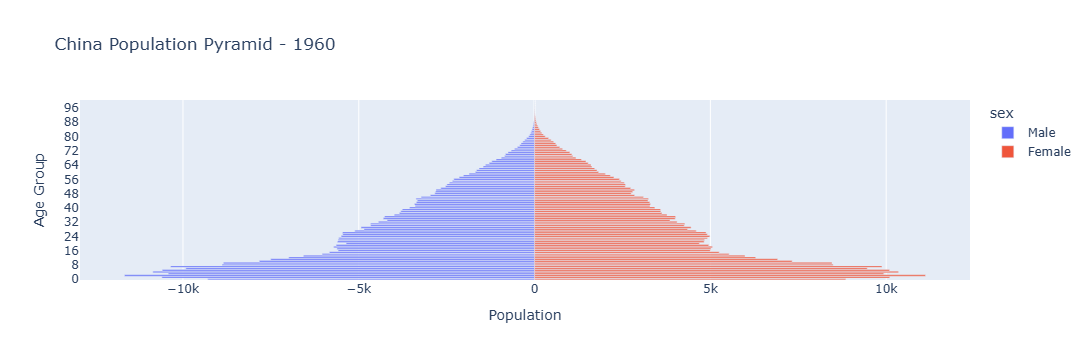

In [40]:
plot_pyramid(1960)
# wide at the base shows very high fertility
# this is pre-reform demographics

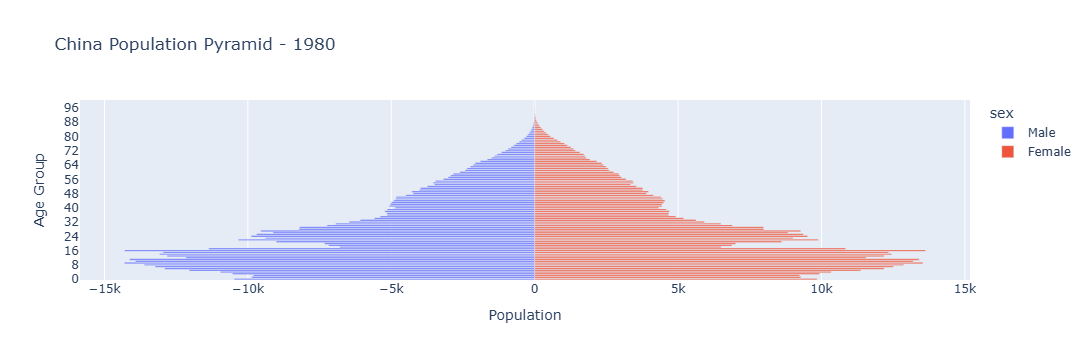

In [41]:
plot_pyramid(1980)
# one child policy starts -> base gets narrower and bulge moves up
# shows fertility is decreasing

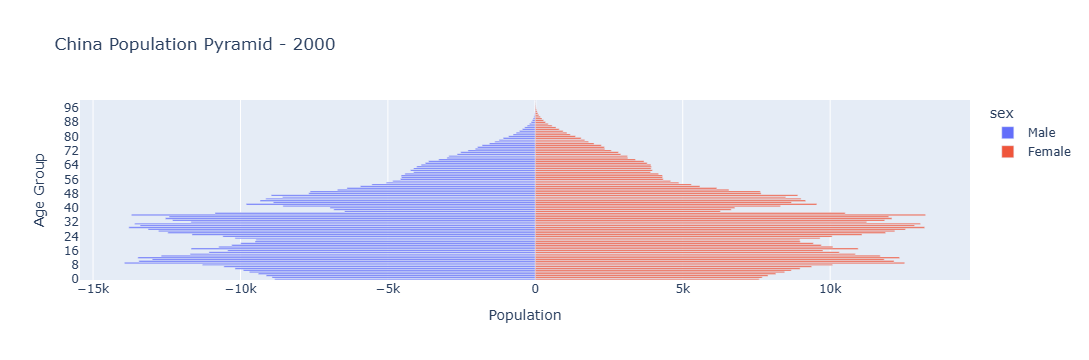

In [43]:
plot_pyramid(2000)
# bulge now at the working age shows increasing lower fertility
# reform period; one child policy in full effect

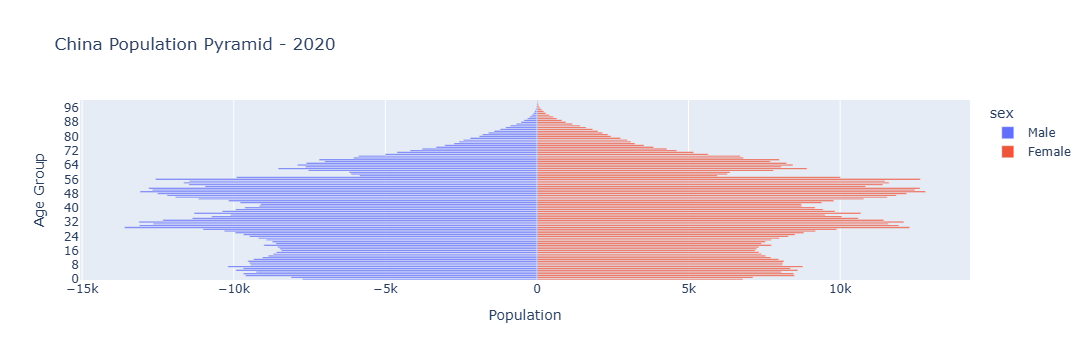

In [44]:
plot_pyramid(2020)
# population starts aging out as fertility rate stays below 2
# dependency of older population on younger population

## Sectoral Changes

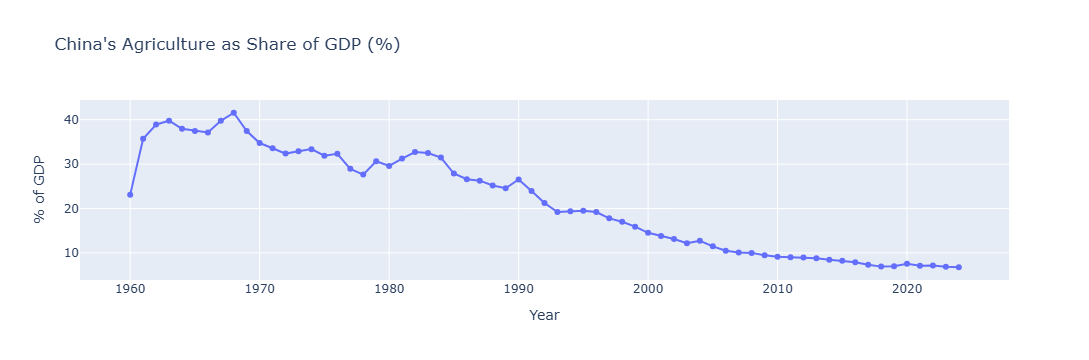

In [47]:
fig = px.line(china_df, x = "date", y = "ag_va",
              title = "China's Agriculture as Share of GDP (%)",
              markers = True)

fig.update_layout(
    template = "plotly",
    xaxis_title = "Year",
    yaxis_title = "% of GDP")
fig.show()

In [48]:
# urbanization and rural -> urban migration
indicators["SP.URB.TOTL.IN.ZS"] = "urban_pct"

china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df = china_df.sort_values("date")

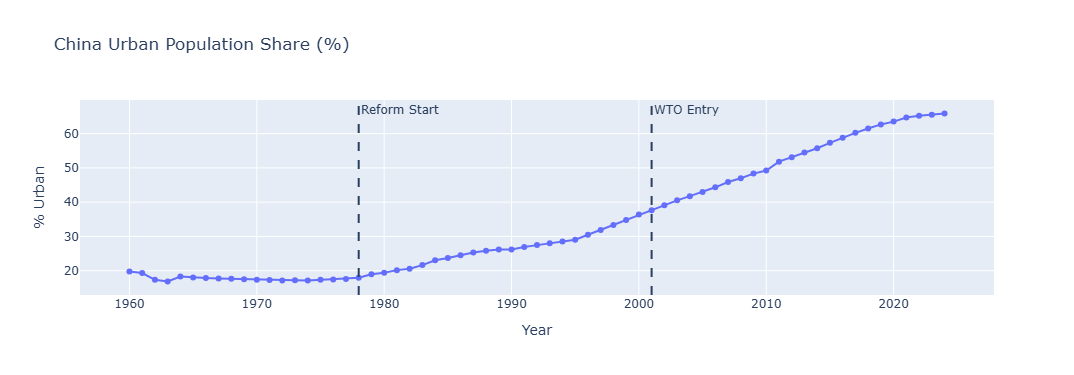

In [49]:
fig = px.line(china_df, x = "date", y = "urban_pct", markers = True,
              title = "China Urban Population Share (%)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "% Urban")
fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform Start")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

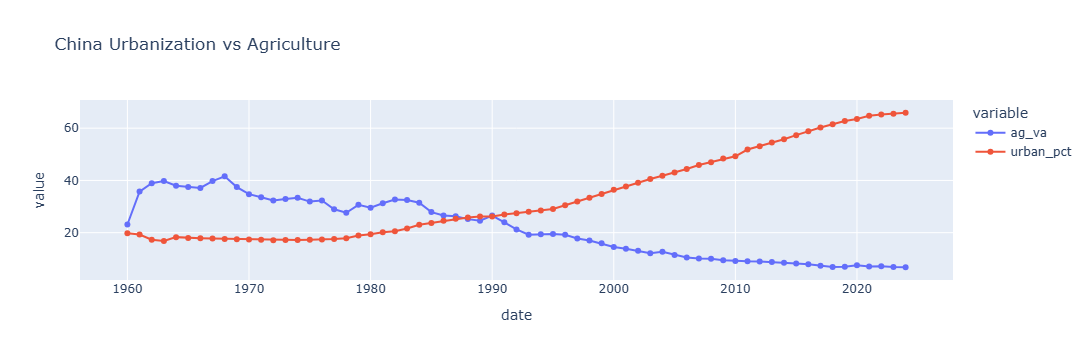

In [50]:
px.line(china_df, x = "date", y = ["ag_va", "urban_pct"], markers = True,
        title = "China Urbanization vs Agriculture").show()

As the economy shifted away from the agrarian policies forced during the Great Leap Forward, agriculture value-added decreased while urbanization increased. This changing relationship coincides with the drop in fertility and rise in GDP per capita that we saw previously.

### Unit Testing

In [51]:
# years ordered correctly
assert china_df["date"].is_monotonic_increasing, "Years are not sorted"

# population numbers make sense
assert (china_df["pop"] >= 0).all(), "Negative population found"
assert (china_df["pop"] > 0).all(), "Zero population found"

# pop pyramid gender checks
assert (china["PopMale"] >= 0).all(), "Negative male population found"
assert (china["PopFemale"] >= 0).all(), "Negative female population found"
assert (china["PopTotal"] >= 0).all(), "Negative total population found"

# total male + female check
diff = china["PopMale"] + china["PopFemale"] - china["PopTotal"]
assert (diff.abs() < 1e-6).all(), "Male + Female ≠ Total"

# gdp check
assert (china_df["gdp_percap"] > 0).all(), "Bad GDP per capita values"

In [65]:
# final [A] deliverable: Population DataFrames
age_sex_df = (
    pop_age
    .assign(
        male_col = "M_" + pop_age["AgeGrp"].astype(str),
        female_col = "F_" + pop_age["AgeGrp"].astype(str)
    )
    .pipe(lambda d: 
        d.pivot_table(index=["Location","Time"],
                      columns="male_col",
                      values="PopMale",
                      aggfunc="sum")
        .join(
            d.pivot_table(index=["Location","Time"],
                          columns="female_col",
                          values="PopFemale",
                          aggfunc="sum")
        )
    )
    .sort_index(axis=1)
)

age_sex_df.head()

F_0        F_1      F_10  F_100+      F_11      F_12      F_13      F_14      F_15      F_16  \
Location Time                                                                                                       
China    1950   8703.747   7840.546  4889.154   0.377  5029.659  5045.518  5137.410  5211.908  5148.159  5119.496   
         1951   9922.626   8206.432  5138.799   0.468  4860.336  5002.417  5020.058  5112.929  5188.034  5124.940   
         1952   9873.013   9380.587  5221.852   0.536  5110.057  4835.332  4978.413  4997.279  5090.598  5165.705   
         1953  11387.190   9344.506  5155.907   0.595  5194.247  5085.201  4813.373  4957.010  4976.572  5069.784   
         1954  10799.605  10790.111  5118.196   0.643  5130.102  5170.335  5063.339  4793.766  4937.526  4957.243   

                   F_17      F_18      F_19       F_2      F_20      F_21      F_22      F_23      F_24      F_25  \
Location Time                                                                                                       
China    1950  4833.581  4583.104  4697.780  6969.121  4498.158  4522.687  4292.985  4085.289  4246.091  4261.788   
         1951  5096.148  4810.739  4560.272  7610.436  4672.926  4472.879  4495.942  4266.627  4059.639  4219.179   
         1952  5102.620  5073.146  4787.832  7980.344  4537.161  4647.764  4447.495  4469.452  4240.906  4034.888   
         1953  5144.310  5080.695  5050.135  9137.965  4764.691  4513.814  4622.541  4422.398  4443.640  4216.120   
         1954  5049.808  5123.256  5058.717  9107.508  5026.836  4741.256  4490.356  4597.539  4397.885  4418.705   

                   F_26      F_27      F_28      F_29       F_3      F_30      F_31      F_32      F_33      F_34  \
Location Time                                                                                                       
China    1950  4008.152  3860.162  3835.410  3837.694  6514.282  3672.219  3536.387  3566.084  3560.082  3519.025   
         1951  4234.663  3982.489  3835.178  3810.156  6810.359  3811.824  3646.755  3511.134  3539.911  3533.252   
         1952  4193.348  4208.606  3957.716  3810.909  7437.647  3785.488  3786.467  3621.781  3486.404  3514.290   
         1953  4011.173  4168.576  4183.486  3933.685  7811.773  3787.239  3761.348  3761.635  3597.364  3462.239   
         1954  4192.313  3988.379  4144.638  4159.056  8957.716  3910.189  3764.022  3737.655  3737.301  3573.451   

                   F_35      F_36      F_37      F_38      F_39       F_4      F_40      F_41      F_42      F_43  \
Location Time                                                                                                       
China    1950  3552.597  3412.153  3151.354  3059.923  3126.675  5939.843  3203.002  3102.395  2951.136  2982.569   
         1951  3491.718  3524.056  3383.548  3123.563  3031.354  6397.201  3095.636  3169.200  3067.783  2916.656   
         1952  3506.893  3464.704  3495.573  3354.756  3095.385  6689.008  3002.232  3063.969  3134.872  3032.921   
         1953  3489.165  3480.864  3437.799  3466.961  3325.618  7306.706  3066.718  2972.582  3031.878  3100.369   
         1954  3438.493  3464.305  3454.889  3410.720  3437.948  7684.436  3295.915  3037.478  2942.484  2999.571   

                   F_44      F_45      F_46      F_47      F_48      F_49       F_5      F_50      F_51      F_52  \
Location Time                                                                                                       
China    1950  2968.281  2885.915  2852.778  2693.268  2598.781  2455.238  5578.752  2251.996  2232.965  2191.543   
         1951  2946.446  2931.260  2848.869  2814.840  2655.661  2560.048  5854.257  2415.626  2212.464  2190.624   
         1952  2882.231  2910.580  2894.496  2811.830  2776.416  2616.989  6306.046  2519.740  2374.307  2171.649   
         1953  2998.191  2848.129  2875.046  2857.825  2774.407  2736.999  6597.115  2576.840  2477.791  2331.742   
         1954  3065.940  2963.729  2814